# EDA ON TITANIC DATASET

In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv('/content/drive/MyDrive/datasets/titanic_test.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
df.shape

(891, 12)

# **Data Preprocessing**

In [6]:
#removing the columns
df = df.drop(columns=['PassengerId','Name','Cabin','Ticket'], axis= 1)

In [7]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [39]:
#checking data types
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [40]:
#checking for unique value count
df.nunique()

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


In [41]:
#checking for missing value count
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


## **Refining the data**

In [43]:
# replacing the missing values
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)
df['Embarked'] = df['Embarked'].replace(np.nan, 'S')

<ipython-input-43-9ee90c9fefc9>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_age, inplace=True)


In [44]:
#type casting Age to integer
df['Age'] = df['Age'].astype(int)

In [45]:
#replacing with 1 and female with 0
df['Sex'] = df['Sex'].apply(lambda x : 1 if x == 'male' else 0)

Categorising in groups i.e. Infant(0-5), Teen (6-20), 20s(21-30), 30s(31-40), 40s(41-50), 50s(51-60), Elder(61-100)

In [46]:
# creating age groups - young (0-18), adult(18-30), middle aged(30-50), old (50-100)
df['Age'] = pd.cut(x=df['Age'], bins=[0, 5, 20, 30, 40, 50, 60, 100], labels = ['Infant', 'Teen', '20s', '30s', '40s', '50s', 'Elder'])

# Exploratory Data Analysis

Plotting the Countplot to visualize the number

<Axes: xlabel='Parch', ylabel='count'>

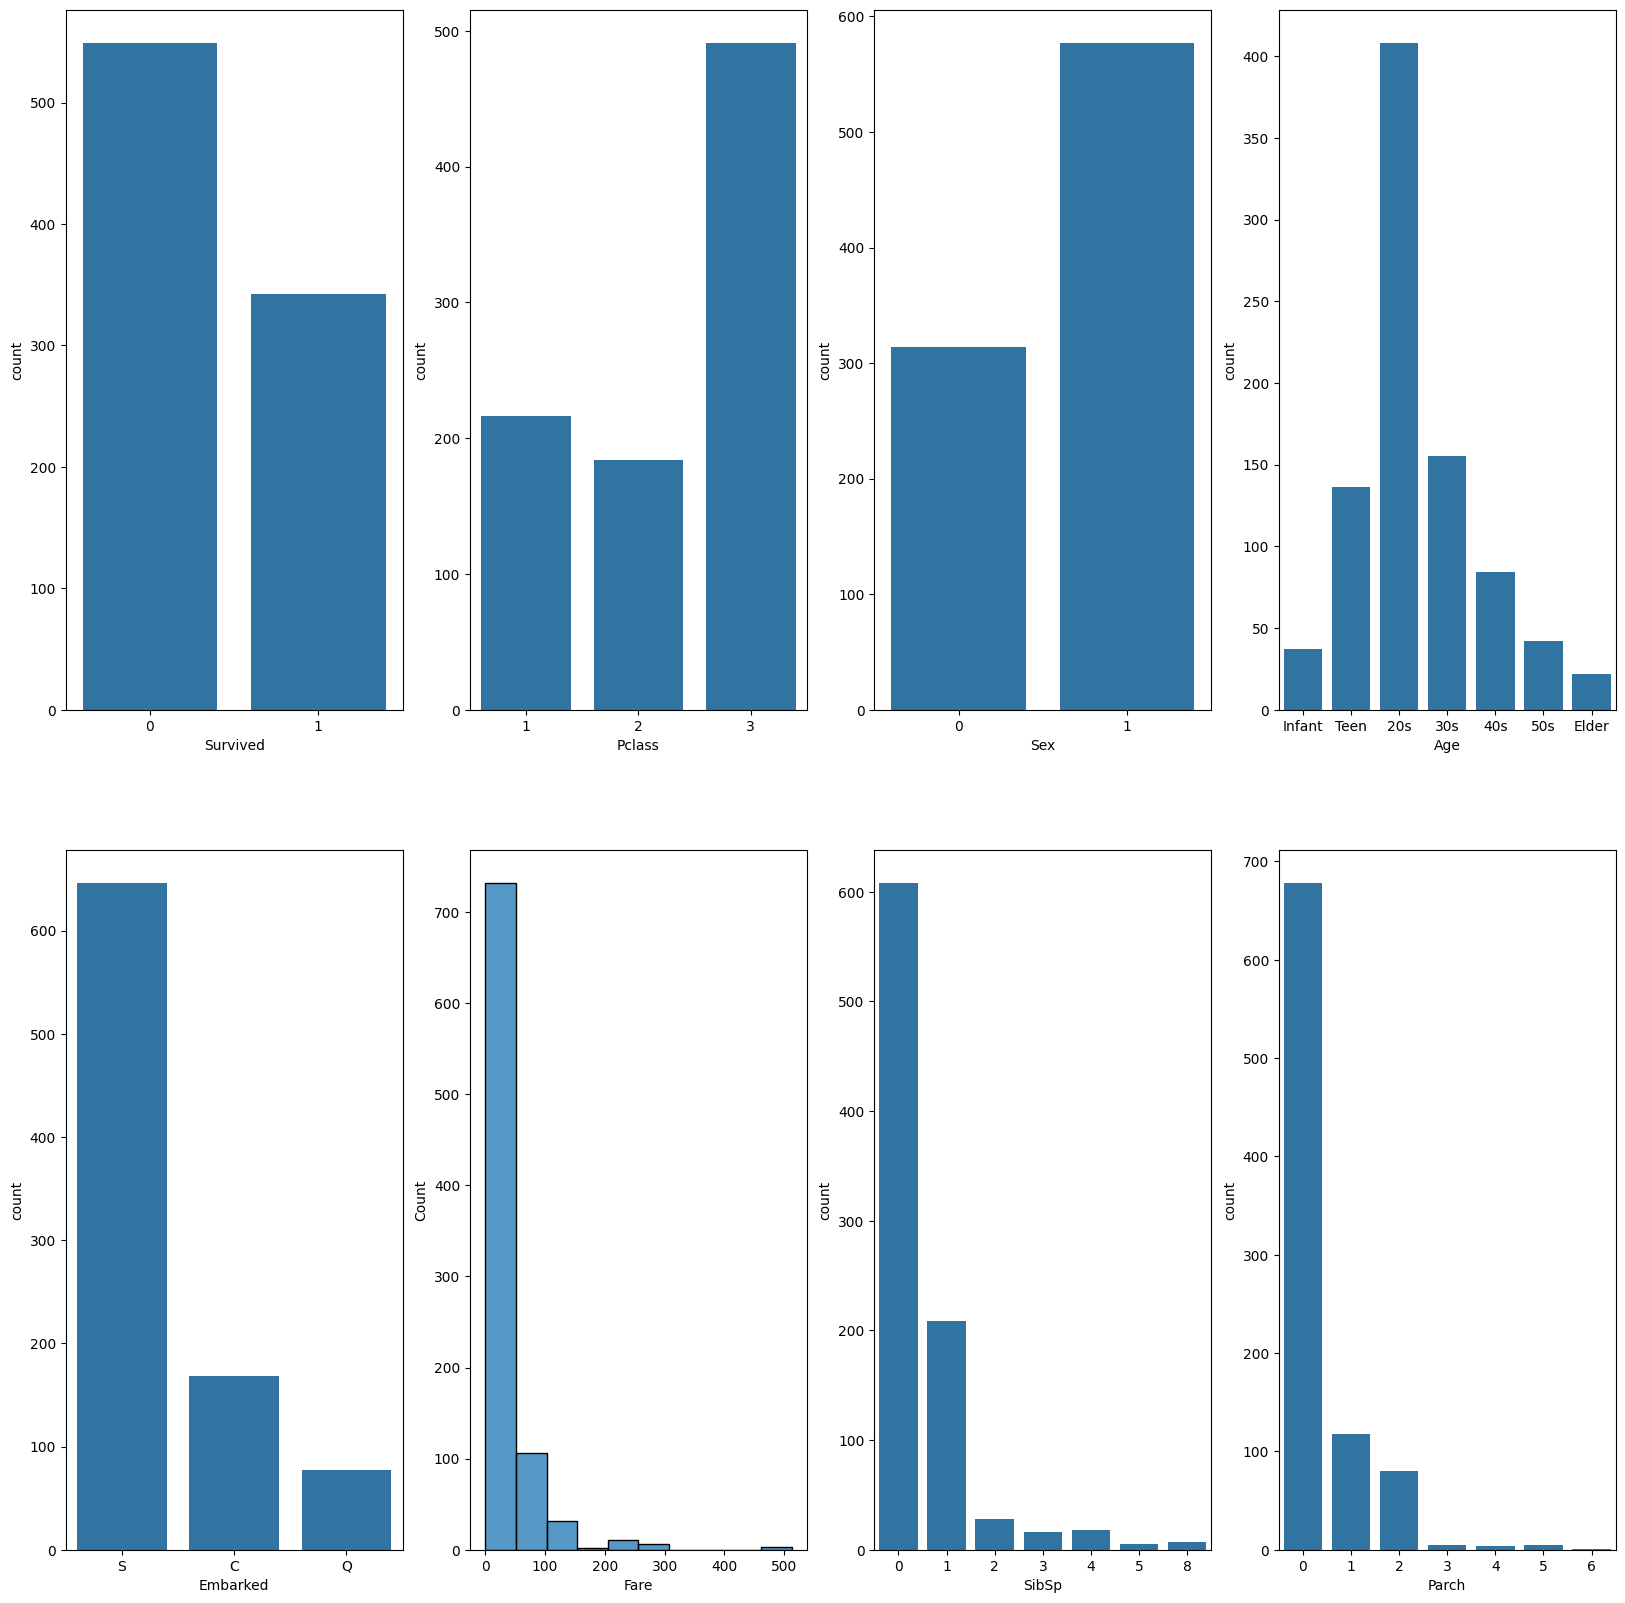

In [47]:
# visulizing the count of the features
fig, ax = plt.subplots(2,4,figsize=(20,20))
sns.countplot(x = 'Survived', data = df, ax= ax[0,0])
sns.countplot(x = 'Pclass', data = df, ax=ax[0,1])
sns.countplot(x = 'Sex', data = df, ax=ax[0,2])
sns.countplot(x = 'Age', data = df, ax=ax[0,3])
sns.countplot(x = 'Embarked', data = df, ax=ax[1,0])
sns.histplot(x = 'Fare', data= df, bins=10, ax=ax[1,1])
sns.countplot(x = 'SibSp', data = df, ax=ax[1,2])
sns.countplot(x = 'Parch', data = df, ax=ax[1,3])

Visualizing the replationship between the features

<Axes: xlabel='Pclass', ylabel='Survived'>

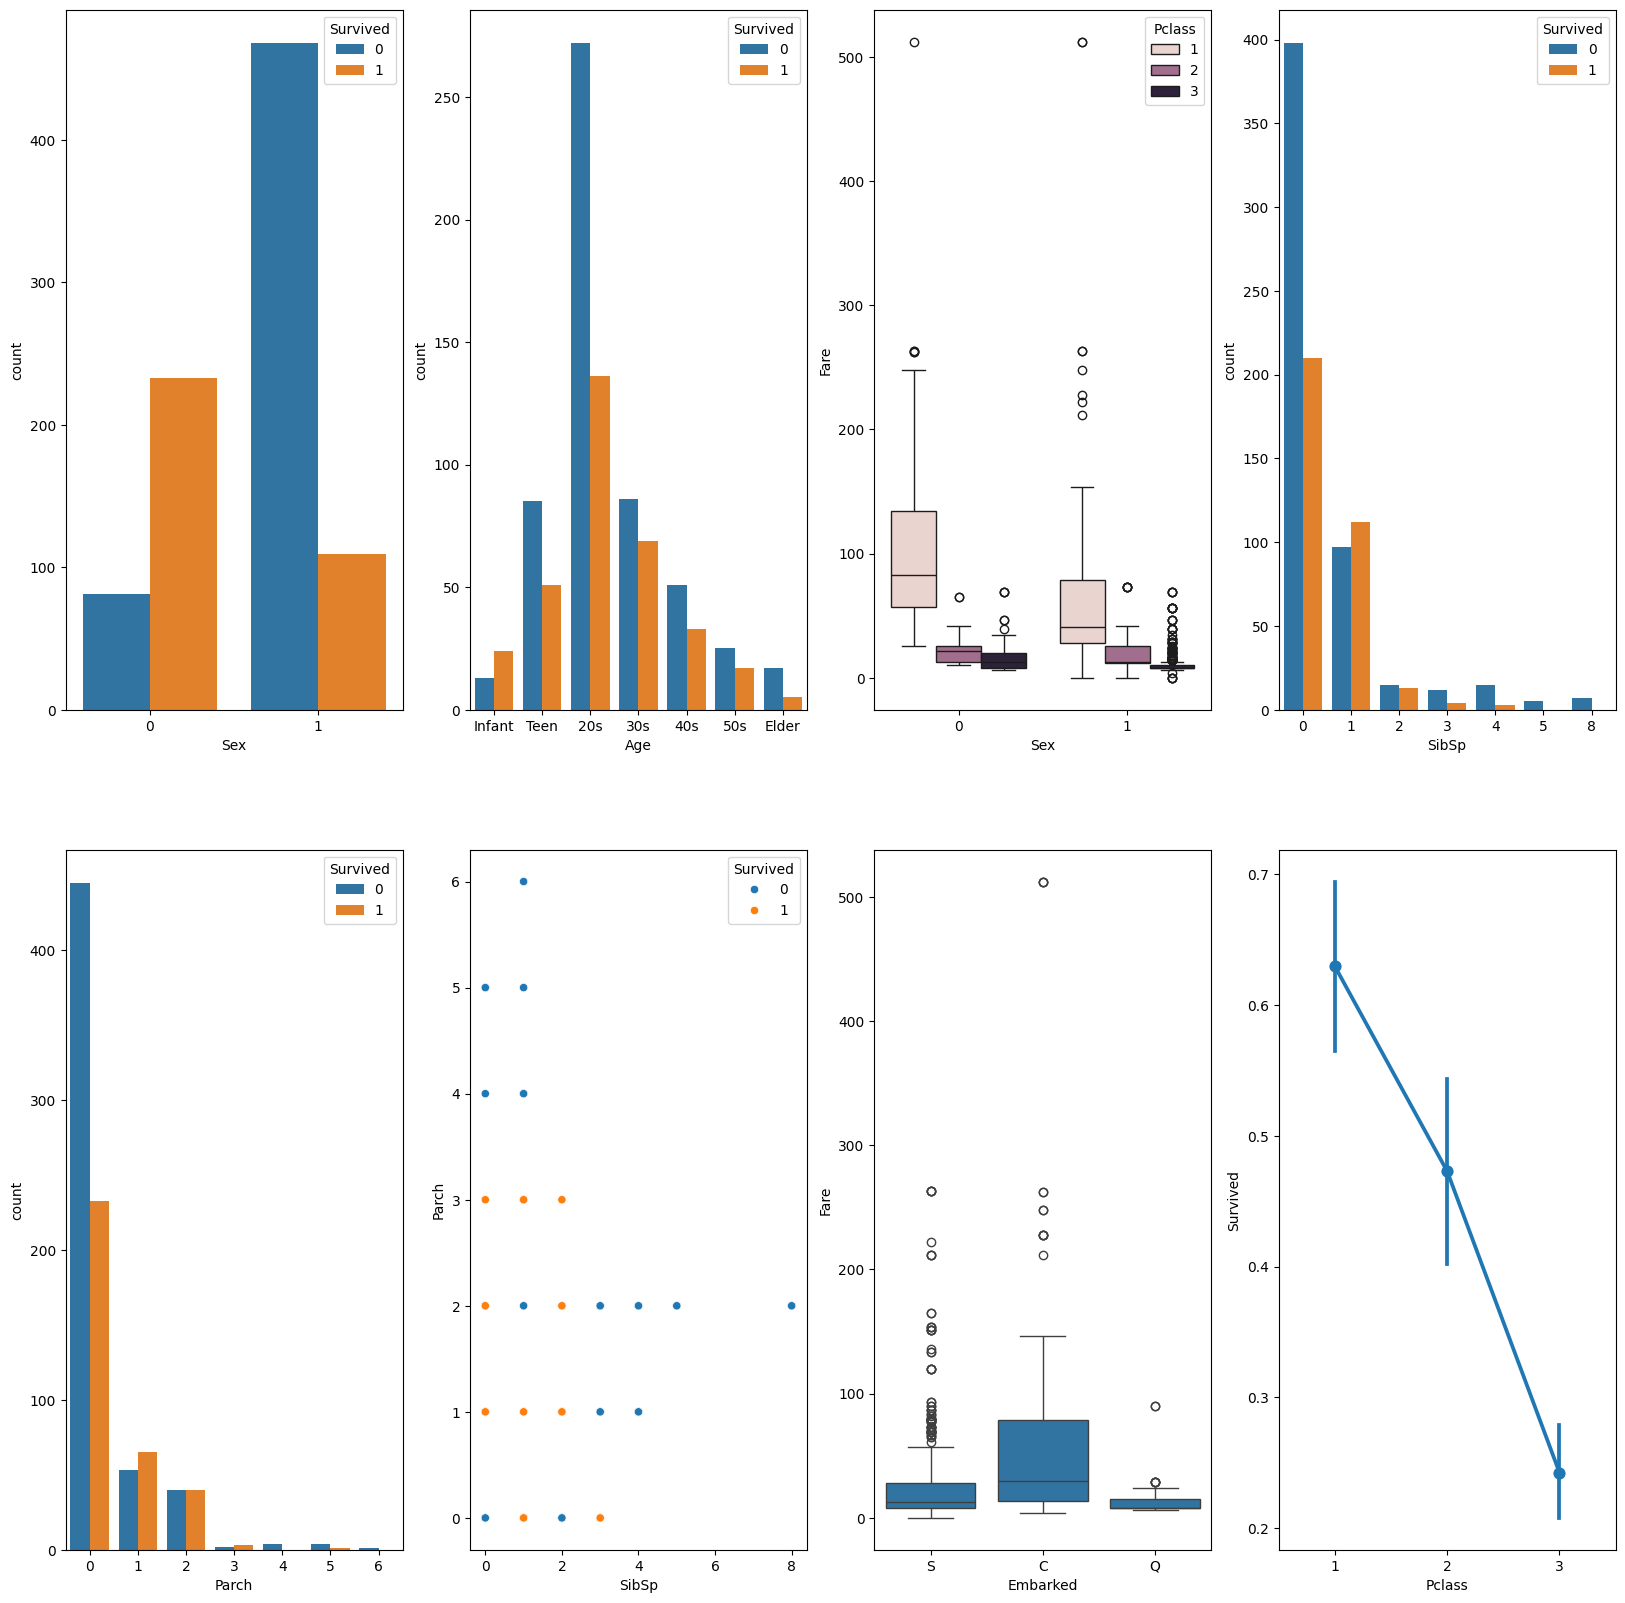

In [48]:
fig, ax = plt.subplots(2,4,figsize=(20,20))
sns.countplot(x = 'Sex', data = df, hue = 'Survived', ax= ax[0,0])
sns.countplot(x = 'Age', data = df, hue = 'Survived', ax=ax[0,1])
sns.boxplot(x = 'Sex',y='Fare', data = df, hue = 'Pclass', ax=ax[0,2])
sns.countplot(x = 'SibSp', data = df, hue = 'Survived', ax=ax[0,3])
sns.countplot(x = 'Parch', data = df, hue = 'Survived', ax=ax[1,0])
sns.scatterplot(x = 'SibSp', y = 'Parch', data = df,hue = 'Survived', ax=ax[1,1])
sns.boxplot(x = 'Embarked', y ='Fare', data = df, ax=ax[1,2])
sns.pointplot(x = 'Pclass', y = 'Survived', data = df, ax=ax[1,3])